In [1]:
import numpy as np
import pandas as pd

WD= pd.read_csv("012330-99999-2017.csv")

print(WD.shape)
list(WD)

(8635, 26)


['Total_Record_length',
 'Weather_Station_USAF ',
 'Year',
 'Month',
 'Day',
 'Date',
 'time.H',
 'Obs Type',
 'Latitude',
 'Longitude',
 'SYNOP Type',
 'Elevation(m)',
 'Call Letter Identifier',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)']

In [2]:
colsToDrop = ['Year','Month','Day','Weather_Station_USAF ', 'SYNOP Type','Obs Type',
              'Call Letter Identifier','Weather_Station_USAF ', 'Latitude','Longitude', 'Elevation(m)']
x_train= WD.drop(colsToDrop, axis=1)

y_train = WD['Wind Speed (m/s)']

list(x_train)
print(y_train.shape)

(8635,)


In [3]:
x_train_lag = pd.concat([x_train.shift(24), x_train.shift(48), x_train.shift(72), x_train.shift(94),  x_train.shift(116),  x_train.shift(140),  x_train.shift(164)], axis=1)
list(x_train_lag)

['Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)',
 'Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)',
 'Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)',
 'Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)'

In [4]:
x_train_lag.columns = ["Total_Record_length_lag_1","Date_lag_1","time.H_lag_1","Wind (Angular Degrees)_lag_1",
                       "Wind (QC)_lag_1","Wind TC_lag_1","Wind Speed (m/s)_lag_1","Wind Speed (QC)_lag_1","Air Temp (Cel)_lag_1",
                       "Air Temp (QC)_lag_1","Dew Point (Cel)_lag_1","Dew Point (QC)_lag_1","Precip Time (H)_lag_1",
                       "Precip Depth (mm)_lag_1","Precip (CC)_lag_1","Precip (QC)_lag_1","Total_Record_length_lag_2",
                       "Date_lag_2","time.H_lag_2","Wind (Angular Degrees)_lag_2","Wind (QC)_lag_2","Wind TC_lag_2",
                       "Wind Speed (m/s)_lag_2","Wind Speed (QC)_lag_2","Air Temp (Cel)_lag_2","Air Temp (QC)_lag_2","Dew Point (Cel)_lag_2",
                       "Dew Point (QC)_lag_2","Precip Time (H)_lag_2","Precip Depth (mm)_lag_2","Precip (CC)_lag_2",
                       "Precip (QC)_lag_2","Total_Record_length_lag_3","Date_lag_3","time.H_lag_3",
                       "Wind (Angular Degrees)_lag_3","Wind (QC)_lag_3","Wind TC_lag_3","Wind Speed (m/s)_lag_3",
                       "Wind Speed (QC)_lag_3","Air Temp (Cel)_lag_3","Air Temp (QC)_lag_3","Dew Point (Cel)_lag_3","Dew Point (QC)_lag_3",
                       "Precip Time (H)_lag_3","Precip Depth (mm)_lag_3","Precip (CC)_lag_3","Precip (QC)_lag_3",
                       "Total_Record_length_lag_4","Date_lag_4","time.H_lag_4","Wind (Angular Degrees)_lag_4",
                       "Wind (QC)_lag_4","Wind TC_lag_4","Wind Speed (m/s)_lag_4","Wind Speed (QC)_lag_4","Air Temp (Cel)_lag_4","Air Temp (QC)_lag_4",
                       "Dew Point (Cel)_lag_4","Dew Point (QC)_lag_4","Precip Time (H)_lag_4","Precip Depth (mm)_lag_4",
                       "Precip (CC)_lag_4","Precip (QC)_lag_4","Total_Record_length_lag_5","Date_lag_5","time.H_lag_5",
                       "Wind (Angular Degrees)_lag_5","Wind (QC)_lag_5","Wind TC_lag_5","Wind Speed (m/s)_lag_5",
                       "Wind Speed (QC)_lag_5","Air Temp (Cel)_lag_5","Air Temp (QC)_lag_5","Dew Point (Cel)_lag_5","Dew Point (QC)_lag_5",
                       "Precip Time (H)_lag_5","Precip Depth (mm)_lag_5","Precip (CC)_lag_5","Precip (QC)_lag_5",
                       "Total_Record_length_lag_6","Date_lag_6","time.H_lag_6","Wind (Angular Degrees)_lag_6",
                       "Wind (QC)_lag_6","Wind TC_lag_6","Wind Speed (m/s)_lag_6","Wind Speed (QC)_lag_6","Air Temp (Cel)_lag_6",
                       "Air Temp (QC)_lag_6","Dew Point (Cel)_lag_6","Dew Point (QC)_lag_6","Precip Time (H)_lag_6",
                       "Precip Depth (mm)_lag_6","Precip (CC)_lag_6","Precip (QC)_lag_6","Total_Record_length_lag_7",
                       "Date_lag_7","time.H_lag_7","Wind (Angular Degrees)_lag_7","Wind (QC)_lag_7","Wind TC_lag_7",
                       "Wind Speed (m/s)_lag_7","Wind Speed (QC)_lag_7","Air Temp (Cel)_lag_7","Air Temp (QC)_lag_7","Dew Point (Cel)_lag_7",
                       "Dew Point (QC)_lag_7","Precip Time (H)_lag_7","Precip Depth (mm)_lag_7","Precip (CC)_lag_7",
                       "Precip (QC)_lag_7"]

train_x_lag = pd.concat([x_train_lag, y_train], axis = 1)
print(train_x_lag.shape)

(8635, 113)


In [5]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2OConnectionError: Version mismatch. H2O is version 3.16.0.1, but the h2o-python package is version UNKNOWN. Install the matching h2o-Python version from - http://h2o-release.s3.amazonaws.com/h2o/rel-wheeler/1/index.html.

In [6]:
train_x = h2o.H2OFrame(train_x_lag)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [9]:
y = 'Wind Speed (m/s)'
x = list(train_x.columns)
x.remove(y)
dl_500 = H2ODeepLearningEstimator(epochs=500)
dl_500.train(x, y, train_x)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [10]:
VI_500 = dl_500._model_json['output']['variable_importances'].as_data_frame()
VI_500 = VI_500.iloc[0:27,]

In [12]:
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

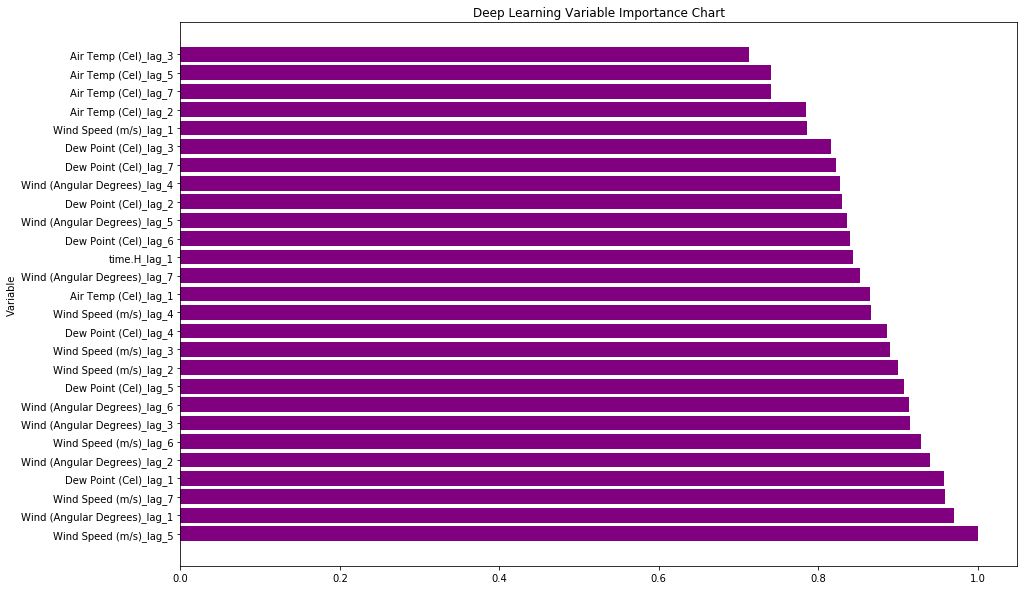

In [13]:
plt.figure(figsize=(15,10))
x = VI_500['variable']
relative_importance = VI_500['relative_importance']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, relative_importance, color='purple')
plt.ylabel("Variable")
plt.title("Deep Learning Variable Importance Chart")

plt.yticks(x_pos, x)

plt.show()



In [15]:
h2o.cluster().shutdown()